In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn import naive_bayes
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from joblib import dump, load


In [2]:
# Load magnitudes

dfCVmags = pd.read_csv('tables/cv_mag.csv')
qsomags = pd.read_csv('tables/qso_mag.csv')
wdmsmags = pd.read_csv('tables/wdms_mag.csv')
obamags = pd.read_csv('tables/oba_mag.csv')


In [3]:
# Color indices calculator function

def colors(pdaframe):
    pdaframe['J0390-J0400']=pdaframe['J0390']-pdaframe['J0400']
    pdaframe['J0400-J0410']=pdaframe['J0400']-pdaframe['J0410']
    pdaframe['J0410-J0420']=pdaframe['J0410']-pdaframe['J0420']
    pdaframe['J0420-J0430']=pdaframe['J0420']-pdaframe['J0430']
    pdaframe['J0430-J0440']=pdaframe['J0430']-pdaframe['J0440']
    pdaframe['J0440-J0450']=pdaframe['J0440']-pdaframe['J0450']
    pdaframe['J0450-J0460']=pdaframe['J0450']-pdaframe['J0460']
    pdaframe['J0460-J0470']=pdaframe['J0460']-pdaframe['J0470']
    pdaframe['J0470-J0480']=pdaframe['J0470']-pdaframe['J0480']
    pdaframe['J0480-J0490']=pdaframe['J0480']-pdaframe['J0490']
    pdaframe['J0490-J0500']=pdaframe['J0490']-pdaframe['J0500']
    pdaframe['J0500-J0510']=pdaframe['J0500']-pdaframe['J0510']
    pdaframe['J0510-J0520']=pdaframe['J0510']-pdaframe['J0520']
    pdaframe['J0520-J0530']=pdaframe['J0520']-pdaframe['J0530']
    pdaframe['J0530-J0540']=pdaframe['J0530']-pdaframe['J0540']
    pdaframe['J0540-J0550']=pdaframe['J0540']-pdaframe['J0550']
    pdaframe['J0550-J0560']=pdaframe['J0550']-pdaframe['J0560']
    pdaframe['J0560-J0570']=pdaframe['J0560']-pdaframe['J0570']
    pdaframe['J0570-J0580']=pdaframe['J0570']-pdaframe['J0580']
    pdaframe['J0580-J0590']=pdaframe['J0580']-pdaframe['J0590']
    pdaframe['J0590-J0600']=pdaframe['J0590']-pdaframe['J0600']
    pdaframe['J0600-J0610']=pdaframe['J0600']-pdaframe['J0610']
    pdaframe['J0610-J0620']=pdaframe['J0610']-pdaframe['J0620']
    pdaframe['J0620-J0630']=pdaframe['J0620']-pdaframe['J0630']
    pdaframe['J0630-J0640']=pdaframe['J0630']-pdaframe['J0640']
    pdaframe['J0640-J0650']=pdaframe['J0640']-pdaframe['J0650']
    pdaframe['J0650-J0660']=pdaframe['J0650']-pdaframe['J0660']
    pdaframe['J0660-J0670']=pdaframe['J0660']-pdaframe['J0670']
    pdaframe['J0670-J0680']=pdaframe['J0670']-pdaframe['J0680']
    pdaframe['J0680-J0690']=pdaframe['J0680']-pdaframe['J0690']
    pdaframe['J0690-J0700']=pdaframe['J0690']-pdaframe['J0700']
    pdaframe['J0700-J0710']=pdaframe['J0700']-pdaframe['J0710']
    pdaframe['J0710-J0720']=pdaframe['J0710']-pdaframe['J0720']
    pdaframe['J0720-J0730']=pdaframe['J0720']-pdaframe['J0730']
    pdaframe['J0730-J0740']=pdaframe['J0730']-pdaframe['J0740']
    pdaframe['J0740-J0750']=pdaframe['J0740']-pdaframe['J0750']
    pdaframe['J0750-J0760']=pdaframe['J0750']-pdaframe['J0760']
    pdaframe['J0760-J0770']=pdaframe['J0760']-pdaframe['J0770']
    pdaframe['J0770-J0780']=pdaframe['J0770']-pdaframe['J0780']
    pdaframe['J0780-J0790']=pdaframe['J0780']-pdaframe['J0790']
    pdaframe['J0790-J0800']=pdaframe['J0790']-pdaframe['J0800']
    pdaframe['J0800-J0810']=pdaframe['J0800']-pdaframe['J0810']
    pdaframe['J0810-J0820']=pdaframe['J0810']-pdaframe['J0820']
    pdaframe['J0820-J0830']=pdaframe['J0820']-pdaframe['J0830']
    pdaframe['J0830-J0840']=pdaframe['J0830']-pdaframe['J0840']
    pdaframe['J0840-J0850']=pdaframe['J0840']-pdaframe['J0850']
    pdaframe['J0850-J0860']=pdaframe['J0850']-pdaframe['J0860']
    pdaframe['J0860-J0870']=pdaframe['J0860']-pdaframe['J0870']
    pdaframe['J0870-J0880']=pdaframe['J0870']-pdaframe['J0880']
    pdaframe['J0880-J0890']=pdaframe['J0880']-pdaframe['J0890']
    pdaframe['J0890-J0900']=pdaframe['J0890']-pdaframe['J0900']
    pdaframe['J0900-J0910']=pdaframe['J0900']-pdaframe['J0910']

    # Hydrogen
    pdaframe['J454']=(pdaframe['J0470']+pdaframe['J0520'])/2 - pdaframe['J0490']
    pdaframe['J666']=(pdaframe['J0640']+pdaframe['J0690'])/2 - pdaframe['J0660']


In [4]:
# Color indices calculation (append to tables)

colors(dfCVmags)
colors(qsomags)
colors(wdmsmags)
colors(obamags)


In [5]:
# Append 'binclass' (1 CV, 0 non-CV)

dfCVmags['binclass']=1
qsomags['binclass']=0
wdmsmags['binclass']=0
obamags['binclass']=0


# Just if we want to plot the different contaminants instead
#dfCVmags['binclass']=0
#qsomags['binclass']=1
#wdmsmags['binclass']=2
#obamags['binclass']=3


In [6]:
# Join objects tables in a single data table

data = pd.concat([dfCVmags, qsomags, wdmsmags, obamags])


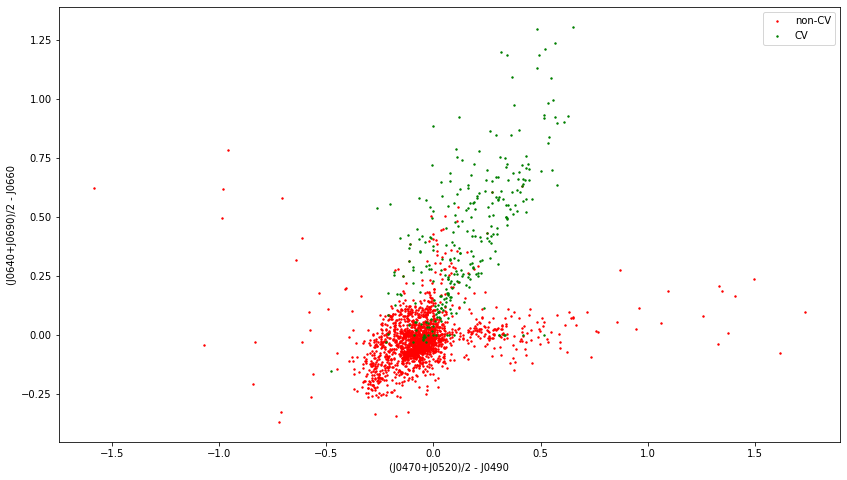

In [7]:
plt.figure(figsize=(14,8))
dncv = data[data['binclass']==0]
dcv = data[data['binclass']==1]
plt.scatter(dncv['J454'], dncv['J666'], s=2, c='r', label='non-CV')
plt.scatter(dcv['J454'], dcv['J666'], s=2, c='g', label='CV')
plt.xlabel('(J0470+J0520)/2 - J0490')
plt.ylabel('(J0640+J0690)/2 - J0660')
plt.legend()


In [7]:
# Random shuffle of the data

#state_number = 42
#data = data.sample(n=len(data), random_state=state_number)


In [7]:
# Prepare X vector (colors as inputs)

X = np.vstack([data['J0390-J0400'],
data['J0400-J0410'],
data['J0410-J0420'],
data['J0420-J0430'],
data['J0430-J0440'],
data['J0440-J0450'],
data['J0450-J0460'],
data['J0460-J0470'],
data['J0470-J0480'],
data['J0480-J0490'],
data['J0490-J0500'],
data['J0500-J0510'],
data['J0510-J0520'],
data['J0520-J0530'],
data['J0530-J0540'],
data['J0540-J0550'],
data['J0550-J0560'],
data['J0560-J0570'],
data['J0570-J0580'],
data['J0580-J0590'],
data['J0590-J0600'],
data['J0600-J0610'],
data['J0610-J0620'],
data['J0620-J0630'],
data['J0630-J0640'],
data['J0640-J0650'],
data['J0650-J0660'],
data['J0660-J0670'],
data['J0670-J0680'],
data['J0680-J0690'],
data['J0690-J0700'],
data['J0700-J0710'],
data['J0710-J0720'],
data['J0720-J0730'],
data['J0730-J0740'],
data['J0740-J0750'],
data['J0750-J0760'],
data['J0760-J0770'],
data['J0770-J0780'],
data['J0780-J0790'],
data['J0790-J0800'],
data['J0800-J0810'],
data['J0810-J0820'],
data['J0820-J0830'],
data['J0830-J0840'],
data['J0840-J0850'],
data['J0850-J0860'],
data['J0860-J0870'],
data['J0870-J0880'],
data['J0880-J0890'],
data['J0890-J0900'],
data['J0900-J0910']]).T


In [8]:
# Prepare labels vector

y = data['binclass'].values


In [9]:
X_hydrogen = np.vstack([data['J454'], data['J666']]).T


In [10]:
# Random state
random = 42


In [11]:
# Dimensionality reduction for visualization

X_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', random_state=random).fit_transform(X)

X2d_xmin, X2d_xmax = np.min(X_embedded[:,0]), np.max(X_embedded[:,0])
X2d_ymin, X2d_ymax = np.min(X_embedded[:,1]), np.max(X_embedded[:,1])


c:\Users\AntonioOrtega\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


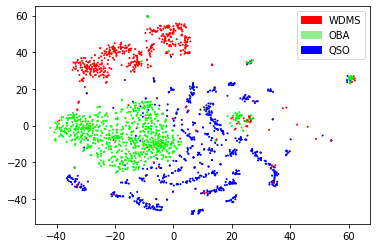

In [195]:
# Just if we want to plot the contaminants instead

#indexes = np.where(y == 0)
#for index in indexes:
#    X_embedded[index] = np.nan

#plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, s=1, cmap=plt.cm.brg)
#red_patch = mpatches.Patch(color='red', label='WDMS')
#green_patch = mpatches.Patch(color='lightgreen', label='OBA')
#blue_patch = mpatches.Patch(color='blue', label='QSO')
#plt.legend(handles=[red_patch, green_patch, blue_patch])
#plt.show()


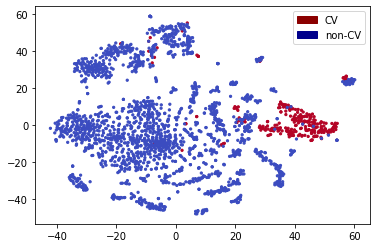

In [12]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, s=5, cmap=plt.cm.coolwarm)
red_patch = mpatches.Patch(color='darkred', label='CV')
blue_patch = mpatches.Patch(color='darkblue', label='non-CV')
plt.legend(handles=[red_patch, blue_patch])
plt.show()


In [ ]:
#################### FOLDS ###################################

In [13]:
def my_metrics(scores):
    # fold, prec, class0
    pnc = [scores[0][0][0], scores[1][0][0], scores[2][0][0]]
    pc = [scores[0][0][1], scores[1][0][1], scores[2][0][1]]

    rnc = [scores[0][1][0], scores[1][1][0], scores[2][1][0]]
    rc = [scores[0][1][1], scores[1][1][1], scores[2][1][1]]

    fnc = [scores[0][2][0], scores[1][2][0], scores[2][2][0]]
    fc = [scores[0][2][1], scores[1][2][1], scores[2][2][1]]

    ncv = scores[0][3][0]
    cv = scores[0][3][1]

    wfa = (np.mean(fc)*cv + np.mean(fnc)*ncv)/(ncv+cv)

    mfa = (np.mean(fc) + np.mean(fnc))/(2)

    print("non-CV %0.2f Precision, std %0.2f" % (np.mean(pnc), np.std(pnc)))
    print("    CV %0.2f Precision, std %0.2f" % (np.mean(pc), np.std(pc)))

    print("non-CV %0.2f Recall, std %0.2f" % (np.mean(rnc), np.std(rnc)))
    print("    CV %0.2f Recall, std %0.2f" % (np.mean(rc), np.std(rc)))

    print("non-CV %0.2f F1, std %0.2f" % (np.mean(fnc), np.std(fnc)))
    print("    CV %0.2f F1, std %0.2f" % (np.mean(fc), np.std(fc)))

    #print("       %0.2f F1 macro avg" % (mfa))
    print("       %0.2f F1 macro avg, std %0.2f" % (np.mean(fc+fnc), np.std(fc+fnc)))

# Plot boundaries
def make_meshgrid(x, y, h=.01):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


In [14]:
# Gaussian Naive Bayes Folds

gnb = naive_bayes.GaussianNB()
n_splits = 3

scores = []
skfolds = StratifiedKFold(n_splits=n_splits, random_state=random, shuffle=True)
for fold, (train_index, test_index) in enumerate(skfolds.split(X, y)):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    scores.append(metrics.precision_recall_fscore_support(y_test, y_pred))

my_metrics(scores)


non-CV 0.98 Precision, std 0.00
    CV 0.35 Precision, std 0.09
non-CV 0.75 Recall, std 0.09
    CV 0.89 Recall, std 0.01
non-CV 0.85 F1, std 0.05
    CV 0.50 F1, std 0.09
       0.67 F1 macro avg, std 0.19


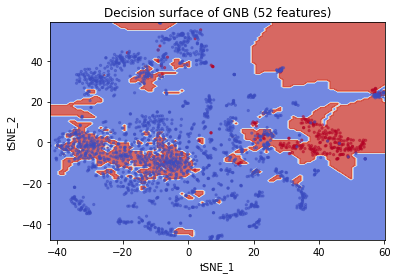

In [15]:
resolution = 100
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

y_predicted_gnb = gnb.predict(X)
# approximate Voronoi tesselation on resolution x resolution grid using 1-NearestNeigh
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_embedded, y_predicted_gnb)
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
fig, ax = plt.subplots()
plt.contourf(xx, yy, voronoiBackground, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, s=5, alpha=0.5, cmap=plt.cm.coolwarm)
title = ('Decision surface of GNB (52 features)')
ax.set_title(title)
ax.set_xlabel("tSNE_1")
ax.set_ylabel("tSNE_2")
plt.show()


In [16]:
dump(gnb, 'models/gnb.joblib')


['models/gnb.joblib']

In [20]:
gnb2 = naive_bayes.GaussianNB()

scores2 = []
skfolds2 = StratifiedKFold(n_splits=n_splits, random_state=random, shuffle=True)
for fold, (train_index, test_index) in enumerate(skfolds2.split(X_hydrogen, y)):
    X_train = X_hydrogen[train_index]
    y_train = y[train_index]
    X_test = X_hydrogen[test_index]
    y_test = y[test_index]
    gnb2.fit(X_train, y_train)
    y_pred = gnb2.predict(X_test)
    scores2.append(metrics.precision_recall_fscore_support(y_test, y_pred))

my_metrics(scores2)


non-CV 0.96 Precision, std 0.01
    CV 0.76 Precision, std 0.03
non-CV 0.97 Recall, std 0.01
    CV 0.68 Recall, std 0.04
non-CV 0.96 F1, std 0.00
    CV 0.72 F1, std 0.03
       0.84 F1 macro avg, std 0.12


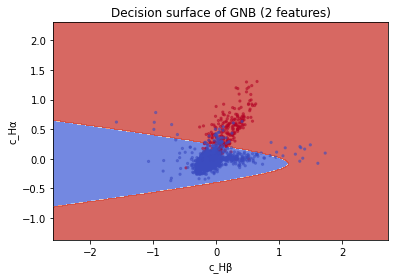

In [21]:
fig, ax = plt.subplots()
title = ('Decision surface of GNB (2 features)')
X0, X1 = X_hydrogen[:, 0], X_hydrogen[:, 1]
xx2, yy2 = make_meshgrid(X0, X1)
plot_contours(ax, gnb2, xx2, yy2, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=5, alpha=0.5)
ax.set_title(title)
ax.set_xlabel("c_Hβ")
ax.set_ylabel("c_Hα")
plt.show()


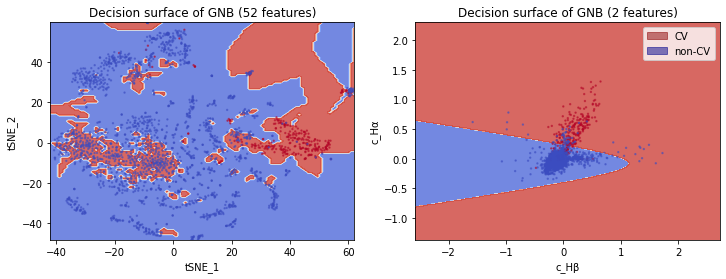

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.contourf(xx, yy, voronoiBackground, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X_embedded[:,0], X_embedded[:,1], c=y, s=2, alpha=0.5, cmap=plt.cm.coolwarm)
ax1.set_title('Decision surface of GNB (52 features)')
ax1.set_xlabel("tSNE_1")
ax1.set_ylabel("tSNE_2")

plot_contours(ax2, gnb2, xx2, yy2, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=2, alpha=0.5)
ax2.set_title('Decision surface of GNB (2 features)')
ax2.set_xlabel("c_Hβ")
ax2.set_ylabel("c_Hα")
red_patch = mpatches.Patch(color='darkred', label='CV')
red_patch.set_alpha(0.5)
blue_patch = mpatches.Patch(color='darkblue', label='non-CV')
blue_patch.set_alpha(0.5)
plt.legend(handles=[red_patch, blue_patch])
plt.savefig('gnb.pdf', bbox_inches='tight')
plt.show()


In [17]:
# Decision Tree Folds

dectree = tree.DecisionTreeClassifier()
n_splits = 3
scores = []
skfolds = StratifiedKFold(n_splits=n_splits, random_state=random, shuffle=True)
for fold, (train_index, test_index) in enumerate(skfolds.split(X, y)):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    dectree.fit(X_train, y_train)
    y_pred = dectree.predict(X_test)
    scores.append(metrics.precision_recall_fscore_support(y_test, y_pred))

my_metrics(scores)


non-CV 0.97 Precision, std 0.00
    CV 0.78 Precision, std 0.01
non-CV 0.97 Recall, std 0.00
    CV 0.82 Recall, std 0.01
non-CV 0.97 F1, std 0.00
    CV 0.80 F1, std 0.00
       0.88 F1 macro avg, std 0.09


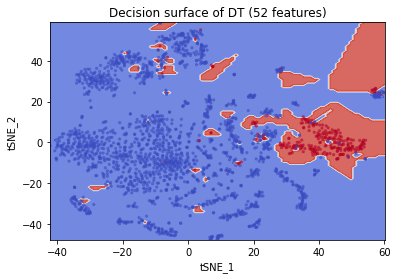

In [18]:
resolution = 100
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

y_predicted_dectree = dectree.predict(X)
# approximate Voronoi tesselation on resolution x resolution grid using 1-NearestNeigh
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_embedded, y_predicted_dectree)
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
fig, ax = plt.subplots()
plt.contourf(xx, yy, voronoiBackground, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, s=5, alpha=0.5, cmap=plt.cm.coolwarm)
title = ('Decision surface of DT (52 features)')
ax.set_title(title)
ax.set_xlabel("tSNE_1")
ax.set_ylabel("tSNE_2")
plt.show()


In [20]:
dump(dectree, 'models/dt.joblib')


['models/dt.joblib']

In [19]:
dectree2 = tree.DecisionTreeClassifier()

scores2 = []
skfolds2 = StratifiedKFold(n_splits=n_splits, random_state=random, shuffle=True)
for fold, (train_index, test_index) in enumerate(skfolds2.split(X_hydrogen, y)):
    X_train = X_hydrogen[train_index]
    y_train = y[train_index]
    X_test = X_hydrogen[test_index]
    y_test = y[test_index]
    dectree2.fit(X_train, y_train)
    y_pred = dectree2.predict(X_test)
    scores2.append(metrics.precision_recall_fscore_support(y_test, y_pred))

my_metrics(scores2)


non-CV 0.96 Precision, std 0.01
    CV 0.74 Precision, std 0.02
non-CV 0.97 Recall, std 0.01
    CV 0.71 Recall, std 0.04
non-CV 0.96 F1, std 0.00
    CV 0.72 F1, std 0.01
       0.84 F1 macro avg, std 0.12


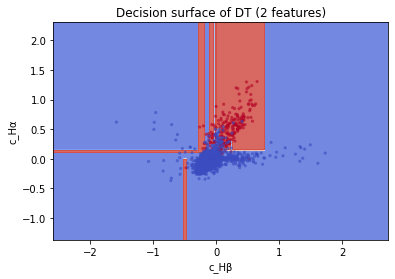

In [38]:
fig, ax = plt.subplots()
title = ('Decision surface of DT (2 features)')
X0, X1 = X_hydrogen[:, 0], X_hydrogen[:, 1]
xx2, yy2 = make_meshgrid(X0, X1)
plot_contours(ax, dectree2, xx2, yy2, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=5, alpha=0.5)
ax.set_title(title)
ax.set_xlabel("c_Hβ")
ax.set_ylabel("c_Hα")
plt.show()


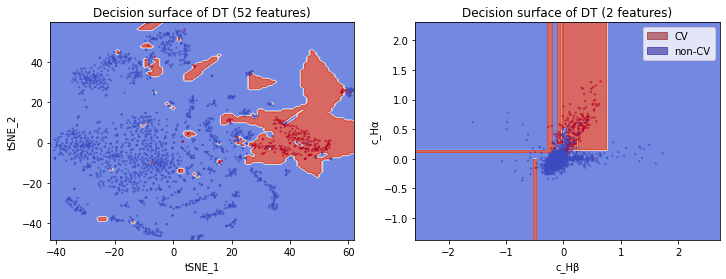

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.contourf(xx, yy, voronoiBackground, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X_embedded[:,0], X_embedded[:,1], c=y, s=2, alpha=0.5, cmap=plt.cm.coolwarm)
ax1.set_title('Decision surface of DT (52 features)')
ax1.set_xlabel("tSNE_1")
ax1.set_ylabel("tSNE_2")

plot_contours(ax2, dectree2, xx2, yy2, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=2, alpha=0.5)
ax2.set_title('Decision surface of DT (2 features)')
ax2.set_xlabel("c_Hβ")
ax2.set_ylabel("c_Hα")
red_patch = mpatches.Patch(color='darkred', label='CV')
red_patch.set_alpha(0.5)
blue_patch = mpatches.Patch(color='darkblue', label='non-CV')
blue_patch.set_alpha(0.5)
plt.legend(handles=[red_patch, blue_patch])
plt.savefig('dt.pdf', bbox_inches='tight')
plt.show()


In [21]:
# Linear SVC Folds

lsvc = LinearSVC(max_iter=6000)

n_splits = 3
scores = []
skfolds = StratifiedKFold(n_splits=n_splits, random_state=random, shuffle=True)
for fold, (train_index, test_index) in enumerate(skfolds.split(X, y)):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    lsvc.fit(X_train, y_train)
    y_pred = lsvc.predict(X_test)
    scores.append(metrics.precision_recall_fscore_support(y_test, y_pred))

my_metrics(scores)


non-CV 0.96 Precision, std 0.00
    CV 0.89 Precision, std 0.01
non-CV 0.99 Recall, std 0.00
    CV 0.74 Recall, std 0.02
non-CV 0.98 F1, std 0.00
    CV 0.81 F1, std 0.01
       0.89 F1 macro avg, std 0.08


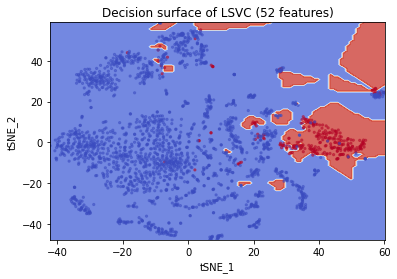

In [22]:
resolution = 100
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

y_predicted_lsvc = lsvc.predict(X)
# approximate Voronoi tesselation on resolution x resolution grid using 1-NearestNeigh
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_embedded, y_predicted_lsvc)
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
fig, ax = plt.subplots()
plt.contourf(xx, yy, voronoiBackground, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, s=5, alpha=0.5, cmap=plt.cm.coolwarm)
title = ('Decision surface of LSVC (52 features)')
ax.set_title(title)
ax.set_xlabel("tSNE_1")
ax.set_ylabel("tSNE_2")
plt.show()


In [23]:
dump(lsvc, 'models/lsvc.joblib')


['models/lsvc.joblib']

In [44]:
lsvc2 = LinearSVC(max_iter=6000)

scores2 = []
skfolds2 = StratifiedKFold(n_splits=n_splits, random_state=random, shuffle=True)
for fold, (train_index, test_index) in enumerate(skfolds2.split(X_hydrogen, y)):
    X_train = X_hydrogen[train_index]
    y_train = y[train_index]
    X_test = X_hydrogen[test_index]
    y_test = y[test_index]
    lsvc2.fit(X_train, y_train)
    y_pred = lsvc2.predict(X_test)
    scores2.append(metrics.precision_recall_fscore_support(y_test, y_pred))

my_metrics(scores2)


non-CV 0.95 Precision, std 0.01
    CV 0.82 Precision, std 0.02
non-CV 0.98 Recall, std 0.00
    CV 0.59 Recall, std 0.05
non-CV 0.96 F1, std 0.00
    CV 0.69 F1, std 0.04
       0.83 F1 macro avg, std 0.14


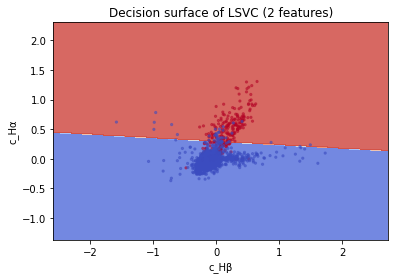

In [45]:
fig, ax = plt.subplots()
title = ('Decision surface of LSVC (2 features)')
X0, X1 = X_hydrogen[:, 0], X_hydrogen[:, 1]
xx2, yy2 = make_meshgrid(X0, X1)
plot_contours(ax, lsvc2, xx2, yy2, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=5, alpha=0.5)
ax.set_title(title)
ax.set_xlabel("c_Hβ")
ax.set_ylabel("c_Hα")
plt.show()


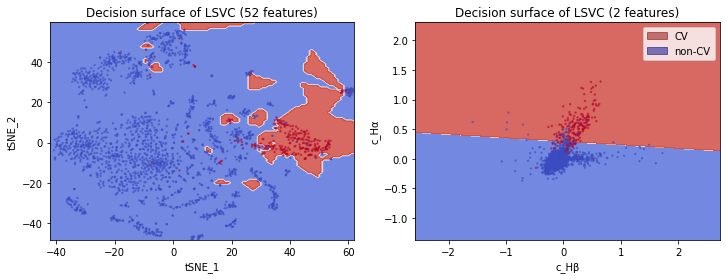

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.contourf(xx, yy, voronoiBackground, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X_embedded[:,0], X_embedded[:,1], c=y, s=2, alpha=0.5, cmap=plt.cm.coolwarm)
ax1.set_title('Decision surface of LSVC (52 features)')
ax1.set_xlabel("tSNE_1")
ax1.set_ylabel("tSNE_2")

plot_contours(ax2, lsvc2, xx2, yy2, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=2, alpha=0.5)
ax2.set_title('Decision surface of LSVC (2 features)')
ax2.set_xlabel("c_Hβ")
ax2.set_ylabel("c_Hα")
red_patch = mpatches.Patch(color='darkred', label='CV')
red_patch.set_alpha(0.5)
blue_patch = mpatches.Patch(color='darkblue', label='non-CV')
blue_patch.set_alpha(0.5)
plt.legend(handles=[red_patch, blue_patch])
plt.savefig('lsvc.pdf', bbox_inches='tight')
plt.show()


In [24]:
# C-SVC Folds

csvc = SVC(kernel='rbf', C=50)

n_splits = 3
scores = []
skfolds = StratifiedKFold(n_splits=n_splits, random_state=random, shuffle=True)
for fold, (train_index, test_index) in enumerate(skfolds.split(X, y)):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    csvc.fit(X_train, y_train)
    y_pred = csvc.predict(X_test)
    scores.append(metrics.precision_recall_fscore_support(y_test, y_pred))

my_metrics(scores)


non-CV 0.98 Precision, std 0.00
    CV 0.94 Precision, std 0.02
non-CV 0.99 Recall, std 0.00
    CV 0.88 Recall, std 0.02
non-CV 0.99 F1, std 0.00
    CV 0.91 F1, std 0.01
       0.95 F1 macro avg, std 0.04


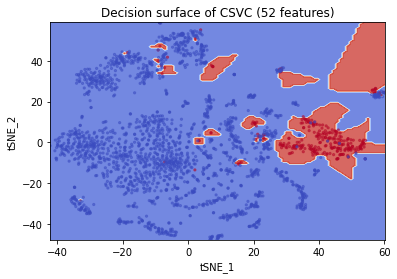

In [25]:
resolution = 100
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

y_predicted_csvc = csvc.predict(X)
# approximate Voronoi tesselation on resolution x resolution grid using 1-NearestNeigh
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_embedded, y_predicted_csvc)
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
fig, ax = plt.subplots()
plt.contourf(xx, yy, voronoiBackground, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, s=5, alpha=0.5, cmap=plt.cm.coolwarm)
title = ('Decision surface of CSVC (52 features)')
ax.set_title(title)
ax.set_xlabel("tSNE_1")
ax.set_ylabel("tSNE_2")
plt.show()


In [26]:
dump(csvc, 'models/csvc.joblib')


['models/csvc.joblib']

In [49]:
csvc2 = SVC(kernel='rbf', C=50)

scores2 = []
skfolds2 = StratifiedKFold(n_splits=n_splits, random_state=random, shuffle=True)
for fold, (train_index, test_index) in enumerate(skfolds2.split(X_hydrogen, y)):
    X_train = X_hydrogen[train_index]
    y_train = y[train_index]
    X_test = X_hydrogen[test_index]
    y_test = y[test_index]
    csvc2.fit(X_train, y_train)
    y_pred = csvc2.predict(X_test)
    scores2.append(metrics.precision_recall_fscore_support(y_test, y_pred))

my_metrics(scores2)


non-CV 0.96 Precision, std 0.01
    CV 0.81 Precision, std 0.02
non-CV 0.98 Recall, std 0.00
    CV 0.70 Recall, std 0.06
non-CV 0.97 F1, std 0.00
    CV 0.75 F1, std 0.03
       0.86 F1 macro avg, std 0.11


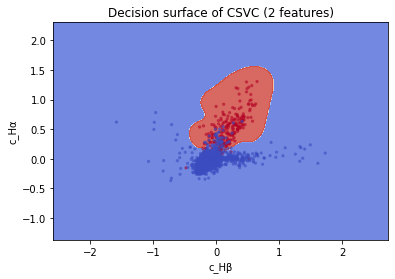

In [50]:
fig, ax = plt.subplots()
title = ('Decision surface of CSVC (2 features)')
X0, X1 = X_hydrogen[:, 0], X_hydrogen[:, 1]
xx2, yy2 = make_meshgrid(X0, X1)
plot_contours(ax, csvc2, xx2, yy2, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=5, alpha=0.5)
ax.set_title(title)
ax.set_xlabel("c_Hβ")
ax.set_ylabel("c_Hα")
plt.show()


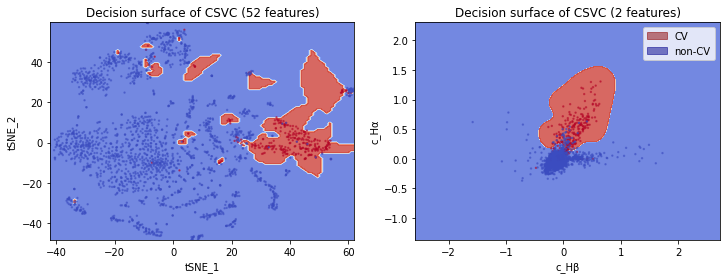

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.contourf(xx, yy, voronoiBackground, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X_embedded[:,0], X_embedded[:,1], c=y, s=2, alpha=0.5, cmap=plt.cm.coolwarm)
ax1.set_title('Decision surface of CSVC (52 features)')
ax1.set_xlabel("tSNE_1")
ax1.set_ylabel("tSNE_2")

plot_contours(ax2, csvc2, xx2, yy2, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=2, alpha=0.5)
ax2.set_title('Decision surface of CSVC (2 features)')
ax2.set_xlabel("c_Hβ")
ax2.set_ylabel("c_Hα")
red_patch = mpatches.Patch(color='darkred', label='CV')
red_patch.set_alpha(0.5)
blue_patch = mpatches.Patch(color='darkblue', label='non-CV')
blue_patch.set_alpha(0.5)
plt.legend(handles=[red_patch, blue_patch])
plt.savefig('csvc.pdf', bbox_inches='tight')
plt.show()


In [27]:
# K-Neighbors Classifier folds

knc = KNeighborsClassifier(n_neighbors=1)

n_splits = 3
scores = []
skfolds = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)
for fold, (train_index, test_index) in enumerate(skfolds.split(X, y)):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    knc.fit(X_train, y_train)
    y_pred = knc.predict(X_test)
    scores.append(metrics.precision_recall_fscore_support(y_test, y_pred))

my_metrics(scores)


non-CV 0.98 Precision, std 0.00
    CV 0.89 Precision, std 0.03
non-CV 0.98 Recall, std 0.00
    CV 0.89 Recall, std 0.02
non-CV 0.98 F1, std 0.00
    CV 0.89 F1, std 0.02
       0.94 F1 macro avg, std 0.05


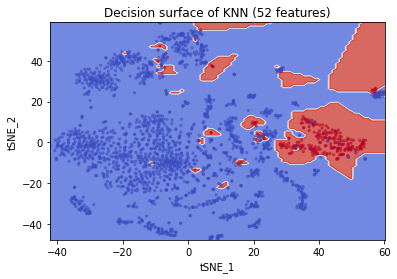

In [28]:
resolution = 100
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

y_predicted_knc = knc.predict(X)
# approximate Voronoi tesselation on resolution x resolution grid using 1-NearestNeigh
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_embedded, y_predicted_knc)
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
fig, ax = plt.subplots()
plt.contourf(xx, yy, voronoiBackground, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, s=5, alpha=0.5, cmap=plt.cm.coolwarm)
title = ('Decision surface of KNN (52 features)')
ax.set_title(title)
ax.set_xlabel("tSNE_1")
ax.set_ylabel("tSNE_2")
plt.show()


In [29]:
dump(knc, 'models/knc.joblib')


['models/knc.joblib']

In [54]:
knc2 = KNeighborsClassifier(n_neighbors=13)

scores2 = []
skfolds2 = StratifiedKFold(n_splits=n_splits, random_state=random, shuffle=True)
for fold, (train_index, test_index) in enumerate(skfolds2.split(X_hydrogen, y)):
    X_train = X_hydrogen[train_index]
    y_train = y[train_index]
    X_test = X_hydrogen[test_index]
    y_test = y[test_index]
    knc2.fit(X_train, y_train)
    y_pred = knc2.predict(X_test)
    scores2.append(metrics.precision_recall_fscore_support(y_test, y_pred))

my_metrics(scores2)


non-CV 0.97 Precision, std 0.01
    CV 0.82 Precision, std 0.03
non-CV 0.98 Recall, std 0.01
    CV 0.75 Recall, std 0.08
non-CV 0.97 F1, std 0.00
    CV 0.78 F1, std 0.04
       0.87 F1 macro avg, std 0.10


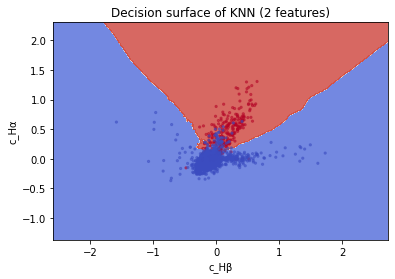

In [55]:
fig, ax = plt.subplots()
title = ('Decision surface of KNN (2 features)')
X0, X1 = X_hydrogen[:, 0], X_hydrogen[:, 1]
xx2, yy2 = make_meshgrid(X0, X1)
plot_contours(ax, knc2, xx2, yy2, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=5, alpha=0.5)
ax.set_title(title)
ax.set_xlabel("c_Hβ")
ax.set_ylabel("c_Hα")
plt.show()


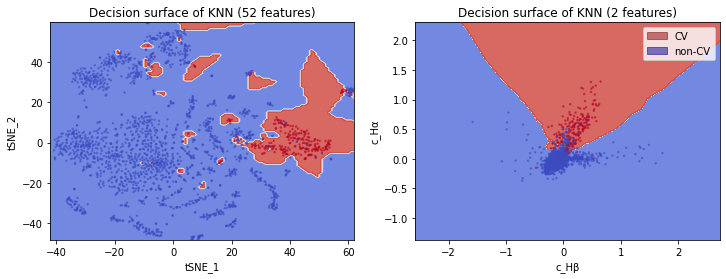

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.contourf(xx, yy, voronoiBackground, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X_embedded[:,0], X_embedded[:,1], c=y, s=2, alpha=0.5, cmap=plt.cm.coolwarm)
ax1.set_title('Decision surface of KNN (52 features)')
ax1.set_xlabel("tSNE_1")
ax1.set_ylabel("tSNE_2")

plot_contours(ax2, knc2, xx2, yy2, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=2, alpha=0.5)
ax2.set_title('Decision surface of KNN (2 features)')
ax2.set_xlabel("c_Hβ")
ax2.set_ylabel("c_Hα")
red_patch = mpatches.Patch(color='darkred', label='CV')
red_patch.set_alpha(0.5)
blue_patch = mpatches.Patch(color='darkblue', label='non-CV')
blue_patch.set_alpha(0.5)
plt.legend(handles=[red_patch, blue_patch])
plt.savefig('knn.pdf', bbox_inches='tight')
plt.show()


In [43]:
######   MLP folds

#mlp = MLPClassifier(max_iter=1000, random_state=random, hidden_layer_sizes=[26, 4])

#n_splits = 3
#scores = []
#skfolds = StratifiedKFold(n_splits=n_splits, random_state=random, shuffle=True)
#for fold, (train_index, test_index) in enumerate(skfolds.split(X, y)):
#    X_train = X[train_index]
#    y_train = y[train_index]
#    X_test = X[test_index]
#    y_test = y[test_index]
#    mlp.fit(X_train, y_train)
#    y_pred = mlp.predict(X_test)
#    scores.append(metrics.precision_recall_fscore_support(y_test, y_pred))

#my_metrics(scores)


non-CV 0.99 Precision, std 0.00
    CV 0.91 Precision, std 0.02
non-CV 0.99 Recall, std 0.00
    CV 0.92 Recall, std 0.02
non-CV 0.99 F1, std 0.00
    CV 0.92 F1, std 0.01
       0.95 F1 macro avg, std 0.04


In [30]:
######   MLP folds ------- BEST ************************************************************************

mlp = MLPClassifier(max_iter=1000, random_state=random, hidden_layer_sizes=[30, 10])

n_splits = 3
scores = []
skfolds = StratifiedKFold(n_splits=n_splits, random_state=random, shuffle=True)
for fold, (train_index, test_index) in enumerate(skfolds.split(X, y)):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    scores.append(metrics.precision_recall_fscore_support(y_test, y_pred))

my_metrics(scores)


non-CV 0.99 Precision, std 0.00
    CV 0.94 Precision, std 0.02
non-CV 0.99 Recall, std 0.00
    CV 0.91 Recall, std 0.00
non-CV 0.99 F1, std 0.00
    CV 0.93 F1, std 0.01
       0.96 F1 macro avg, std 0.03


In [33]:
dump(mlp, 'models/mlp.joblib')


['models/mlp.joblib']

In [62]:
len(test_index)+len(train_index)

2406

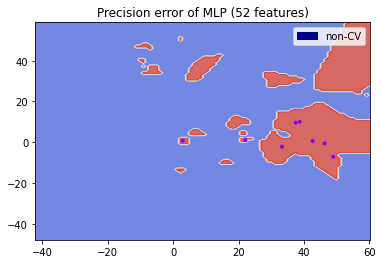

{-1: 8, 0: 2398}

In [31]:
resolution = 100
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

y_predicted_mlp = mlp.predict(X)
# approximate Voronoi tesselation on resolution x resolution grid using 1-NearestNeigh
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_embedded, y_predicted_mlp)
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
fig, ax = plt.subplots()
plt.contourf(xx, yy, voronoiBackground, cmap=plt.cm.coolwarm, alpha=0.8)
#plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, s=5, alpha=0.5, cmap=plt.cm.coolwarm)
title = ('Precision error of MLP (52 features)')
ax.set_title(title)


y_predicted_mlp = mlp.predict(X)
difference = y-y_predicted_mlp
difference = np.where(difference==1, 0, difference)
indexes = np.where(difference == 0)
b = X_embedded.copy()
for index in indexes:
    b[index] = np.nan
plt.scatter(b[:,0], b[:,1], c=difference, s=9, cmap=plt.cm.rainbow)
#red_patch = mpatches.Patch(color='darkred', label='CV')
blue_patch = mpatches.Patch(color='darkblue', label='non-CV')
plt.legend(handles=[blue_patch])
plt.show()

unique, counts = np.unique(difference, return_counts=True)
dict(zip(unique, counts))


In [71]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))


{0: 2112, 1: 294}

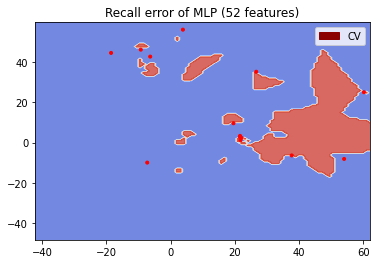

{0: 2392, 1: 14}

In [73]:
resolution = 100
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

y_predicted_mlp = mlp.predict(X)
# approximate Voronoi tesselation on resolution x resolution grid using 1-NearestNeigh
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_embedded, y_predicted_mlp)
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
fig, ax = plt.subplots()
plt.contourf(xx, yy, voronoiBackground, cmap=plt.cm.coolwarm, alpha=0.8)
#plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, s=5, alpha=0.5, cmap=plt.cm.coolwarm)
title = ('Recall error of MLP (52 features)')
ax.set_title(title)


y_predicted_mlp = mlp.predict(X)
difference2 = y-y_predicted_mlp
difference2 = np.where(difference2==-1, 0, difference2)
indexes = np.where(difference2 == 0)
b2 = X_embedded.copy()
for index in indexes:
    b2[index] = np.nan
plt.scatter(b2[:,0], b2[:,1], c=difference2, s=9, cmap=plt.cm.rainbow_r)
red_patch = mpatches.Patch(color='darkred', label='CV')
plt.legend(handles=[red_patch])
plt.show()

unique, counts = np.unique(difference2, return_counts=True)
dict(zip(unique, counts))


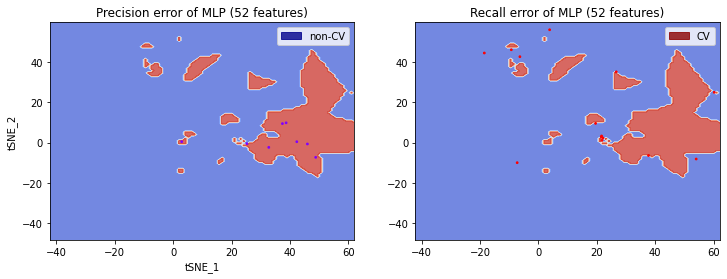

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.contourf(xx, yy, voronoiBackground, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(b[:,0], b[:,1], c=difference, s=3, cmap=plt.cm.rainbow)
blue_patch = mpatches.Patch(color='darkblue', label='non-CV', alpha=0.8)
ax1.legend(handles=[blue_patch])
ax1.set_title('Precision error of MLP (52 features)')
ax1.set_xlabel("tSNE_1")
ax1.set_ylabel("tSNE_2")

ax2.contourf(xx, yy, voronoiBackground, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(b2[:,0], b2[:,1], c=difference2, s=3, cmap=plt.cm.rainbow_r)
red_patch = mpatches.Patch(color='darkred', label='CV', alpha=0.8)
plt.legend(handles=[red_patch])
ax2.set_title('Recall error of MLP (52 features)')
ax1.set_xlabel("tSNE_1")
ax1.set_ylabel("tSNE_2")

plt.savefig('error1.pdf', bbox_inches='tight')
plt.show()


In [52]:
positions = np.where(difference==1)
data.iloc[positions[0]]


,class,plate,mjd,fiber,good,J0390,J0400,J0410,J0420,J0430,...,J0840-J0850,J0850-J0860,J0860-J0870,J0870-J0880,J0880-J0890,J0890-J0900,J0900-J0910,J454,J666,binclass
6,CV,5340,56011,358,True,18.0541,17.9129,17.8327,17.7814,17.7865,...,-0.0110,-0.0086,0.0103,0.0165,0.0076,-0.0087,0.0768,-0.03590,-0.02920,1
28,CV,2623,54096,199,True,17.3351,17.3666,17.4137,17.5920,17.3098,...,-0.0110,0.0685,0.0699,0.0764,0.0181,0.0459,0.0837,0.17915,0.30450,1
44,CV,2533,54585,156,True,15.1828,15.1164,15.0897,15.0441,15.0905,...,-0.0008,-0.0089,0.0040,0.0011,-0.0142,-0.0107,0.0947,-0.03830,-0.00800,1
50,CV,2919,54537,415,True,20.3839,20.3134,20.2252,20.2292,20.1888,...,-0.0602,0.0723,0.0711,0.1038,0.0184,0.0294,0.0746,0.23750,0.11595,1
63,CV,3262,54884,508,True,17.9950,17.9533,17.9565,17.9696,17.9179,...,0.0156,0.0928,0.1176,0.0268,0.0459,0.1475,0.0389,-0.00490,0.01875,1
94,CV,5985,56089,232,True,18.7640,18.7637,18.7973,18.6595,18.8049,...,-0.0755,0.0995,0.1081,0.1253,0.0231,0.0762,0.1515,-0.21355,0.00575,1
124,CV,2701,54154,411,True,20.9439,21.1089,21.0494,21.1004,20.9176,...,0.0367,-0.0159,0.0667,0.0871,-0.1279,-0.0888,0.0177,0.16715,0.20275,1
125,CV,5941,56193,722,True,15.9857,15.9171,15.9311,15.8761,15.9424,...,-0.0052,-0.0185,-0.0198,-0.0055,0.0062,-0.0195,0.1288,-0.04950,-0.01960,1
126,CV,3658,55205,726,True,16.0000,15.9515,15.9708,15.9418,16.0334,...,-0.0119,-0.0128,-0.0134,-0.0144,0.0052,-0.0112,0.1391,-0.04900,-0.01655,1
150,CV,7694,57359,325,False,18.1289,18.1289,18.1289,18.1289,18.1289,...,0.0977,-0.0157,-0.0128,-0.0334,-0.0487,0.0420,0.0122,-0.26115,0.53675,1


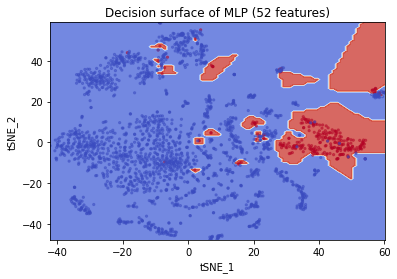

In [32]:
resolution = 100
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

y_predicted_mlp = mlp.predict(X)
# approximate Voronoi tesselation on resolution x resolution grid using 1-NearestNeigh
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_embedded, y_predicted_mlp)
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
fig, ax = plt.subplots()
plt.contourf(xx, yy, voronoiBackground, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, s=5, alpha=0.5, cmap=plt.cm.coolwarm)
title = ('Decision surface of MLP (52 features)')
ax.set_title(title)
ax.set_xlabel("tSNE_1")
ax.set_ylabel("tSNE_2")
plt.show()


In [59]:
mlp2 = MLPClassifier(max_iter=1000, random_state=random, hidden_layer_sizes=[30, 10])

scores2 = []
skfolds2 = StratifiedKFold(n_splits=n_splits, random_state=random, shuffle=True)
for fold, (train_index, test_index) in enumerate(skfolds2.split(X_hydrogen, y)):
    X_train = X_hydrogen[train_index]
    y_train = y[train_index]
    X_test = X_hydrogen[test_index]
    y_test = y[test_index]
    mlp2.fit(X_train, y_train)
    y_pred = mlp2.predict(X_test)
    scores2.append(metrics.precision_recall_fscore_support(y_test, y_pred))

my_metrics(scores2)


non-CV 0.96 Precision, std 0.00
    CV 0.81 Precision, std 0.03
non-CV 0.98 Recall, std 0.00
    CV 0.70 Recall, std 0.03
non-CV 0.97 F1, std 0.00
    CV 0.75 F1, std 0.01
       0.86 F1 macro avg, std 0.11


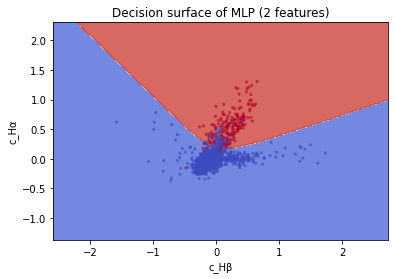

In [60]:
fig, ax = plt.subplots()
title = ('Decision surface of MLP (2 features)')
X0, X1 = X_hydrogen[:, 0], X_hydrogen[:, 1]
xx2, yy2 = make_meshgrid(X0, X1)
plot_contours(ax, mlp2, xx2, yy2, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=5, alpha=0.5)
ax.set_title(title)
ax.set_xlabel("c_Hβ")
ax.set_ylabel("c_Hα")
plt.show()


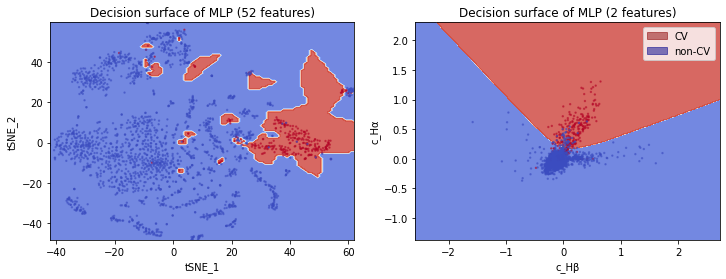

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.contourf(xx, yy, voronoiBackground, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X_embedded[:,0], X_embedded[:,1], c=y, s=2, alpha=0.5, cmap=plt.cm.coolwarm)
ax1.set_title('Decision surface of MLP (52 features)')
ax1.set_xlabel("tSNE_1")
ax1.set_ylabel("tSNE_2")

plot_contours(ax2, mlp2, xx2, yy2, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=2, alpha=0.5)
ax2.set_title('Decision surface of MLP (2 features)')
ax2.set_xlabel("c_Hβ")
ax2.set_ylabel("c_Hα")
red_patch = mpatches.Patch(color='darkred', label='CV')
red_patch.set_alpha(0.5)
blue_patch = mpatches.Patch(color='darkblue', label='non-CV')
blue_patch.set_alpha(0.5)
plt.legend(handles=[red_patch, blue_patch])
plt.savefig('mlp.pdf', bbox_inches='tight')
plt.show()


In [66]:
######   MLP folds

#mlp = MLPClassifier(max_iter=1000, random_state=random, hidden_layer_sizes=[30, 10, 4])

#n_splits = 3
#scores = []
#skfolds = StratifiedKFold(n_splits=n_splits, random_state=random, shuffle=True)
#for fold, (train_index, test_index) in enumerate(skfolds.split(X, y)):
#    X_train = X[train_index]
#    y_train = y[train_index]
#    X_test = X[test_index]
#    y_test = y[test_index]
#    mlp.fit(X_train, y_train)
#    y_pred = mlp.predict(X_test)
#    scores.append(metrics.precision_recall_fscore_support(y_test, y_pred))

#my_metrics(scores)


non-CV 0.99 Precision, std 0.00
    CV 0.93 Precision, std 0.02
non-CV 0.99 Recall, std 0.00
    CV 0.92 Recall, std 0.02
non-CV 0.99 F1, std 0.00
    CV 0.92 F1, std 0.01
       0.96 F1 macro avg, std 0.03


In [32]:
######   MLP folds

#mlp = MLPClassifier(max_iter=1000, random_state=random, hidden_layer_sizes=[26, 12, 6])

#n_splits = 3
#scores = []
#skfolds = StratifiedKFold(n_splits=n_splits, random_state=random, shuffle=True)
#for fold, (train_index, test_index) in enumerate(skfolds.split(X, y)):
#    X_train = X[train_index]
#    y_train = y[train_index]
#    X_test = X[test_index]
#    y_test = y[test_index]
#    mlp.fit(X_train, y_train)
#    y_pred = mlp.predict(X_test)
#    scores.append(metrics.precision_recall_fscore_support(y_test, y_pred))

#my_metrics(scores)


non-CV 0.99 Precision, std 0.00
    CV 0.91 Precision, std 0.01
non-CV 0.99 Recall, std 0.00
    CV 0.90 Recall, std 0.00
non-CV 0.99 F1, std 0.00
    CV 0.91 F1, std 0.01
       0.95 F1 macro avg


In [28]:
######   MLP folds

#mlp = MLPClassifier(max_iter=1000, random_state=random, hidden_layer_sizes=[20, 10, 5])

#n_splits = 3
#scores = []
#skfolds = StratifiedKFold(n_splits=n_splits, random_state=random, shuffle=True)
#for fold, (train_index, test_index) in enumerate(skfolds.split(X, y)):
#    X_train = X[train_index]
#    y_train = y[train_index]
#    X_test = X[test_index]
#    y_test = y[test_index]
#    mlp.fit(X_train, y_train)
#    y_pred = mlp.predict(X_test)
#    scores.append(metrics.precision_recall_fscore_support(y_test, y_pred))

#my_metrics(scores)


non-CV 0.99 Precision, std 0.00
    CV 0.91 Precision, std 0.01
non-CV 0.99 Recall, std 0.00
    CV 0.90 Recall, std 0.02
non-CV 0.99 F1, std 0.00
    CV 0.91 F1, std 0.02
       0.95 F1 macro avg
